In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
employee = pd.DataFrame({'Name':['Babubhai','Jagjivandas','Tribhuvandas','Zaveri'],
        'Joining_date':['04/04/93','06/08/98','01/05/90','15/07/92'],
        'Emp_id':['E120','E240','E360','E480']})

In [3]:
employee

,Name,Joining_date,Emp_id
0,Babubhai,04/04/93,E120
1,Jagjivandas,06/08/98,E240
2,Tribhuvandas,01/05/90,E360
3,Zaveri,15/07/92,E480


In [4]:
employee.dtypes

Name            object
Joining_date    object
Emp_id          object
dtype: object

In [5]:
## changing datatype of datetime
employee['Joining_date']=pd.to_datetime(employee['Joining_date'])
employee.dtypes
employee

Name                    object
Joining_date    datetime64[ns]
Emp_id                  object
dtype: object

,Name,Joining_date,Emp_id
0,Babubhai,1993-04-04,E120
1,Jagjivandas,1998-06-08,E240
2,Tribhuvandas,1990-01-05,E360
3,Zaveri,1992-07-15,E480


In [6]:
## extracing day,month,year,week etc all the details from datetime colummn

In [7]:
employee['Month']=employee.Joining_date.dt.month
employee['Day']=employee.Joining_date.dt.day
employee['Year']=employee.Joining_date.dt.year
employee['Week_Number']=employee.Joining_date.dt.isocalendar().week ## which week in the year
employee['Day_of_the_week'] = employee.Joining_date.dt.dayofweek
employee['Day_Name'] = pd.to_datetime(employee['Joining_date']).dt.day_name() # which day in the week
employee['Month_Name']=pd.to_datetime(employee['Joining_date']).dt.month_name()

In [8]:
employee

,Name,Joining_date,Emp_id,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name
0,Babubhai,1993-04-04,E120,4,4,1993,13,6,Sunday,April
1,Jagjivandas,1998-06-08,E240,6,8,1998,24,0,Monday,June
2,Tribhuvandas,1990-01-05,E360,1,5,1990,1,4,Friday,January
3,Zaveri,1992-07-15,E480,7,15,1992,29,2,Wednesday,July


## %d%/m/%y using strftime()

In [9]:
## changing date time format to %d%m%y format, we use strftime()

In [10]:
## strftime() will convert datetime format into STRING format
employee['Joining_date']=pd.to_datetime(employee['Joining_date']).dt.strftime('%d/%m/%y')
employee
print(employee['Joining_date'].dtypes)

,Name,Joining_date,Emp_id,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name
0,Babubhai,04/04/93,E120,4,4,1993,13,6,Sunday,April
1,Jagjivandas,08/06/98,E240,6,8,1998,24,0,Monday,June
2,Tribhuvandas,05/01/90,E360,1,5,1990,1,4,Friday,January
3,Zaveri,15/07/92,E480,7,15,1992,29,2,Wednesday,July


object


In [11]:
## you can see it is being converted into a string object

## %d-%m-%y using strftime()

In [12]:
employee['Joining_date']=pd.to_datetime(employee['Joining_date']).dt.strftime('%d-%m-%y')
employee

,Name,Joining_date,Emp_id,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name
0,Babubhai,04-04-93,E120,4,4,1993,13,6,Sunday,April
1,Jagjivandas,06-08-98,E240,6,8,1998,24,0,Monday,June
2,Tribhuvandas,01-05-90,E360,1,5,1990,1,4,Friday,January
3,Zaveri,15-07-92,E480,7,15,1992,29,2,Wednesday,July


In [13]:
## Let us find employees who joined after 15-07-1992

In [14]:
from datetime import date
employee[pd.to_datetime(employee['Joining_date']) > pd.Timestamp(date(1992,7,15))]

,Name,Joining_date,Emp_id,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name
0,Babubhai,04-04-93,E120,4,4,1993,13,6,Sunday,April
1,Jagjivandas,06-08-98,E240,6,8,1998,24,0,Monday,June


In [15]:
## let find all the employees who joined between 1990 and 1998

from datetime import date

from datetime import date
employee[(pd.to_datetime(employee['Joining_date']) > pd.Timestamp(date(1990,1,4))) &
(pd.to_datetime(employee['Joining_date']) < pd.Timestamp(date(1998,7,10)))]

,Name,Joining_date,Emp_id,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name
0,Babubhai,04-04-93,E120,4,4,1993,13,6,Sunday,April
1,Jagjivandas,06-08-98,E240,6,8,1998,24,0,Monday,June
2,Tribhuvandas,01-05-90,E360,1,5,1990,1,4,Friday,January
3,Zaveri,15-07-92,E480,7,15,1992,29,2,Wednesday,July


## which is the minimum & maximum date in the dataframe 

In [16]:
pd.to_datetime(employee['Joining_date'].min())

Timestamp('1990-01-05 00:00:00')

In [17]:
pd.to_datetime(employee['Joining_date'].max())

Timestamp('1992-07-15 00:00:00')

## Current Timestamp

In [18]:
## Current TimeStamp
timestamp=pd.to_datetime('now')
print('TimeStamp:{}'.format(timestamp))

TimeStamp:2021-04-10 10:50:57.837830


In [19]:
## Current Day- the day this notebook was created

current_date=pd.to_datetime('now').date()
print('Current_Date:{}'.format(current_date))

Current_Date:2021-04-10


In [20]:
## yesterday
yesterday=pd.to_datetime('now') - pd.Timedelta('1 day')
print('Yesterday:{}'.format(yesterday))

Yesterday:2021-04-09 10:50:57.885831


In [21]:
## tomorrow
tomorrow=pd.to_datetime('now') + pd.Timedelta('1 day')
print('tomorrow:{}'.format(tomorrow))

tomorrow:2021-04-11 10:50:57.925830


In [22]:
## alternate option for tomorrow
tomorrow=pd.to_datetime('now') + pd.DateOffset(days=1)
print('tomorrow:{}'.format(tomorrow))

tomorrow:2021-04-11 10:50:57.949836


In [23]:
## Add Business day to current date --> Saturday and Sunday is excluded

add_business_day=pd.to_datetime('now').date() + pd.offsets.BDay(1)
print('add_business_day:{}'.format(add_business_day))

add_business_day:2021-04-12 00:00:00


In [24]:
## Adding 1 month to the current date
add_one_month = pd.to_datetime('now').date() + pd.DateOffset(months=1)
print('Date after adding one month:{}'.format(add_one_month))

Date after adding one month:2021-05-10 00:00:00


In [25]:
## Calculating Date difference in hours
diff_in_hrs = (pd.to_datetime('2021-04-10 21:05:11') - pd.to_datetime('2021-04-01')).total_seconds() // 3600
print('Date Difference in hours:{}'.format(diff_in_hrs))

Date Difference in hours:237.0


In [26]:
## How many years is the employe with the company (Extract year from the current time and subtact from year column)

employee['no_of_years'] = pd.to_datetime('now').year - pd.to_datetime(employee['Joining_date']).dt.year
employee

,Name,Joining_date,Emp_id,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name,no_of_years
0,Babubhai,04-04-93,E120,4,4,1993,13,6,Sunday,April,28
1,Jagjivandas,06-08-98,E240,6,8,1998,24,0,Monday,June,23
2,Tribhuvandas,01-05-90,E360,1,5,1990,1,4,Friday,January,31
3,Zaveri,15-07-92,E480,7,15,1992,29,2,Wednesday,July,29


## Female birth dataset : 

In [27]:
female_birth = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv')
female_birth.head(10)

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
5,1959-01-06,29
6,1959-01-07,45
7,1959-01-08,43
8,1959-01-09,38
9,1959-01-10,27


In [28]:
pd.to_datetime(female_birth['Date'].min()) #finding the min date

Timestamp('1959-01-01 00:00:00')

In [29]:
pd.to_datetime(female_birth['Date'].max()) #finding the max date

Timestamp('1959-12-31 00:00:00')

In [30]:
## difference between the min and max date
pd.to_datetime(female_birth['Date'].max()) - pd.to_datetime(female_birth['Date'].min())

Timedelta('364 days 00:00:00')

In [31]:
# checking the data type of Date column
female_birth['Date'].dtypes

dtype('O')

In [32]:
# changing it
female_birth['Date']=pd.to_datetime(female_birth['Date'])

In [33]:
female_birth.dtypes
## it is changed

Date      datetime64[ns]
Births             int64
dtype: object

In [34]:
## let us create the helper columns here just how we created it earlier


In [35]:
female_birth['Month']=female_birth.Date.dt.month
female_birth['Day']= female_birth.Date.dt.day
female_birth['Year']=female_birth.Date.dt.year
female_birth['Week_Number']=female_birth.Date.dt.isocalendar().week ## which week in the year
female_birth['Day_of_the_week'] = female_birth.Date.dt.dayofweek
female_birth['Day_Name'] = pd.to_datetime(female_birth['Date']).dt.day_name() # which day in the week
female_birth['Month_Name']=pd.to_datetime(female_birth['Date']).dt.month_name()

In [36]:
female_birth.head()

,Date,Births,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name
0,1959-01-01,35,1,1,1959,1,3,Thursday,January
1,1959-01-02,32,1,2,1959,1,4,Friday,January
2,1959-01-03,30,1,3,1959,1,5,Saturday,January
3,1959-01-04,31,1,4,1959,1,6,Sunday,January
4,1959-01-05,44,1,5,1959,2,0,Monday,January


In [37]:
## Total female births in the month of February
female_birth[female_birth['Month_Name']=='February']['Births'].sum()

1148

In [38]:
## total number of births in January and February
female_birth[female_birth['Month_Name']=='February']['Births'].sum() + female_birth[female_birth['Month_Name']=='January']['Births'].sum()

2361

In [39]:
## Total number of female births using for loop

for i in female_birth['Month_Name'].unique():
    print('Female births in {0}:{1}'.format(i,female_birth[female_birth['Month_Name']==i]['Births'].sum()))

Female births in January:1213
Female births in February:1148
Female births in March:1218
Female births in April:1195
Female births in May:1208
Female births in June:1212
Female births in July:1300
Female births in August:1351
Female births in September:1446
Female births in October:1368
Female births in November:1350
Female births in December:1314


In [40]:
## getting female births in each month using groupby
female_birth.groupby('Month_Name').sum()[['Births']]

,Births
Month_Name,
April,1195
August,1351
December,1314
February,1148
January,1213
July,1300
June,1212
March,1218
May,1208


In [41]:
## it is evident September had maximum number of births and February had the least

## using pivot table for  the same

,Births
Month_Name,
April,1195
August,1351
December,1314
February,1148
January,1213
July,1300
June,1212
March,1218
May,1208


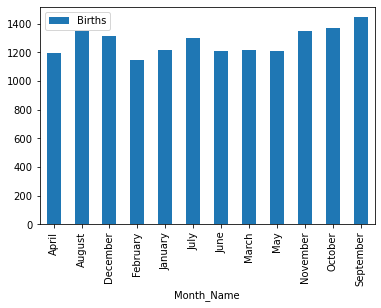

In [42]:
pd.pivot_table(female_birth,values=['Births'],index=['Month_Name'],aggfunc=np.sum)
pd.pivot_table(female_birth,values=['Births'],index=['Month_Name'],aggfunc=np.sum).plot.bar()

In [43]:
female_birth.dtypes

Date               datetime64[ns]
Births                      int64
Month                       int64
Day                         int64
Year                        int64
Week_Number                UInt32
Day_of_the_week             int64
Day_Name                   object
Month_Name                 object
dtype: object

In [44]:
## we will convert Month_Name into Categorical variable and then specify the ordering
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
    

In [45]:
female_birth['Month_Name'] = pd.Categorical(female_birth['Month_Name'],order) #converting the month name using order

In [46]:
female_birth.groupby('Month_Name').sum()[['Births']]

,Births
Month_Name,
January,1213
February,1148
March,1218
April,1195
May,1208
June,1212
July,1300
August,1351
September,1446


<Figure size 1008x432 with 0 Axes>

<BarContainer object of 12 artists>

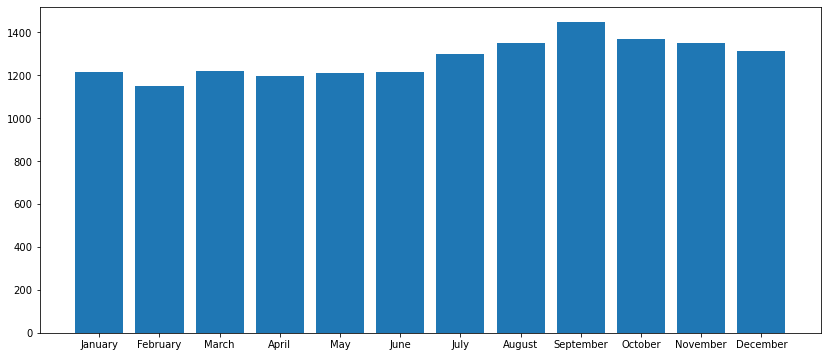

In [47]:
plt.figure(figsize=(14,6))
plt.bar(female_birth.groupby('Month_Name').sum().index,female_birth.groupby('Month_Name').sum()['Births'])
plt.show()

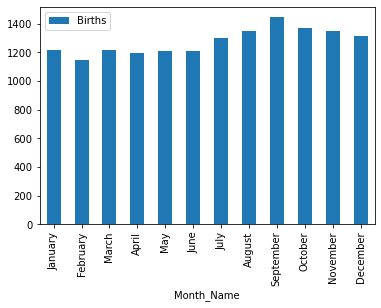

In [48]:
pd.pivot_table(female_birth,values=['Births'],index=['Month_Name'],aggfunc=np.sum).plot.bar()

In [49]:
## using Day_Name field
order=[ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

female_birth['Day Name']=pd.Categorical(female_birth['Day_Name'],order)

female_birth.groupby('Day Name').sum()[['Births']] 

,Births
Day Name,
Monday,2139
Tuesday,2275
Wednesday,2280
Thursday,2283
Friday,2182
Saturday,2142
Sunday,2022


<Figure size 1008x432 with 0 Axes>

<BarContainer object of 7 artists>

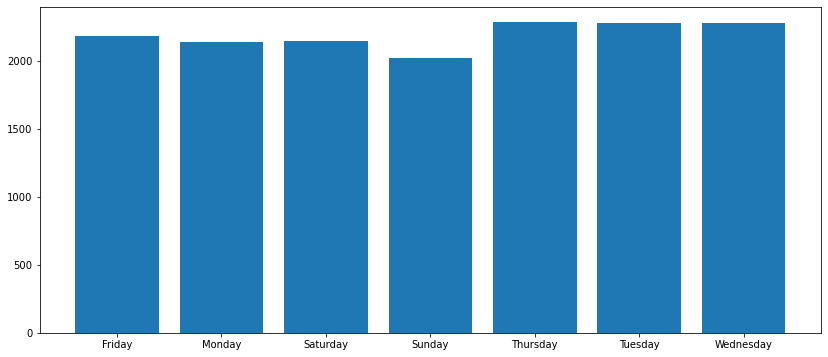

In [50]:
plt.figure(figsize=(14,6))
plt.bar(female_birth.groupby('Day_Name').sum().index,female_birth.groupby('Day_Name').sum()['Births'])
plt.show()

<Figure size 720x432 with 0 Axes>

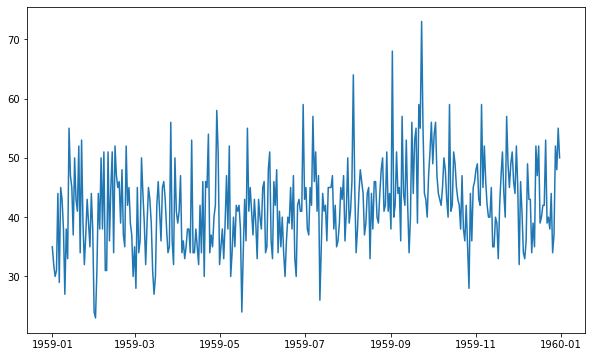

In [51]:
## Plotting female births daily
plt.figure(figsize=(10,6))
plt.plot(female_birth['Date'],female_birth['Births'])

In [52]:
# Get all records for the month of Janaury(1959-01-01 - 1959-01-31).
# Using boolean is not good method when we are dealing with large datasets.

female_birth[(pd.to_datetime(female_birth['Date']) > pd.Timestamp(date(1959,1,1))) &
 (pd.to_datetime(female_birth['Date']) < pd.Timestamp(date(1959,1,31)))]

,Date,Births,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name,Day Name
1,1959-01-02,32,1,2,1959,1,4,Friday,January,Friday
2,1959-01-03,30,1,3,1959,1,5,Saturday,January,Saturday
3,1959-01-04,31,1,4,1959,1,6,Sunday,January,Sunday
4,1959-01-05,44,1,5,1959,2,0,Monday,January,Monday
5,1959-01-06,29,1,6,1959,2,1,Tuesday,January,Tuesday
6,1959-01-07,45,1,7,1959,2,2,Wednesday,January,Wednesday
7,1959-01-08,43,1,8,1959,2,3,Thursday,January,Thursday
8,1959-01-09,38,1,9,1959,2,4,Friday,January,Friday
9,1959-01-10,27,1,10,1959,2,5,Saturday,January,Saturday
10,1959-01-11,38,1,11,1959,2,6,Sunday,January,Sunday


In [53]:
## converting date column into datetime index

female_birth=female_birth.set_index(['Date'])
female_birth

,Births,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name,Day Name
Date,,,,,,,,,
1959-01-01,35,1,1,1959,1,3,Thursday,January,Thursday
1959-01-02,32,1,2,1959,1,4,Friday,January,Friday
1959-01-03,30,1,3,1959,1,5,Saturday,January,Saturday
1959-01-04,31,1,4,1959,1,6,Sunday,January,Sunday
1959-01-05,44,1,5,1959,2,0,Monday,January,Monday
...,...,...,...,...,...,...,...,...,...
1959-12-27,37,12,27,1959,52,6,Sunday,December,Sunday
1959-12-28,52,12,28,1959,53,0,Monday,December,Monday
1959-12-29,48,12,29,1959,53,1,Tuesday,December,Tuesday


In [54]:
## Getting all the data for year 1959
female_birth.loc['1959']

,Births,Month,Day,Year,Week_Number,Day_of_the_week,Day_Name,Month_Name,Day Name
Date,,,,,,,,,
1959-01-01,35,1,1,1959,1,3,Thursday,January,Thursday
1959-01-02,32,1,2,1959,1,4,Friday,January,Friday
1959-01-03,30,1,3,1959,1,5,Saturday,January,Saturday
1959-01-04,31,1,4,1959,1,6,Sunday,January,Sunday
1959-01-05,44,1,5,1959,2,0,Monday,January,Monday
...,...,...,...,...,...,...,...,...,...
1959-12-27,37,12,27,1959,52,6,Sunday,December,Sunday
1959-12-28,52,12,28,1959,53,0,Monday,December,Monday
1959-12-29,48,12,29,1959,53,1,Tuesday,December,Tuesday


In [55]:
## Births for the month of February [1959-02-01] to [1959-02-28]

In [56]:
female_birth.loc['1959-02-01':'1959-02-28'][['Births']]

,Births
Date,
1959-02-01,23
1959-02-02,31
1959-02-03,44
1959-02-04,38
1959-02-05,50
1959-02-06,38
1959-02-07,51
1959-02-08,31
1959-02-09,31


In [57]:
## total number of births in Feb'1959
female_birth.loc['1959-02-01':'1959-02-28'][['Births']].sum()

Births    1148
dtype: int64

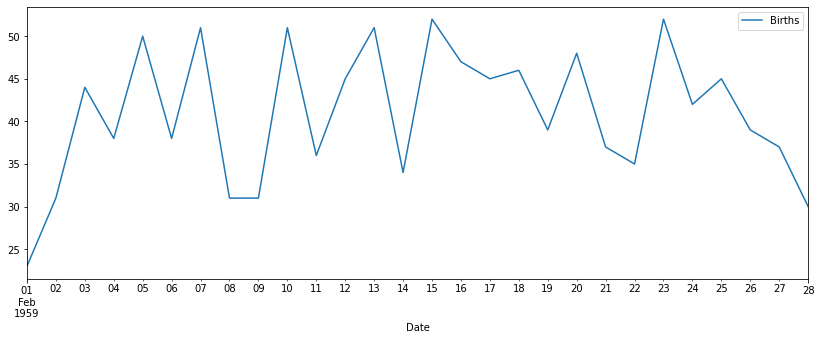

In [58]:
## Plotting line chart for month of february
female_birth.loc['1959-02-01':'1959-02-28'][['Births']].plot(figsize=(14,5))

<Figure size 1080x360 with 0 Axes>

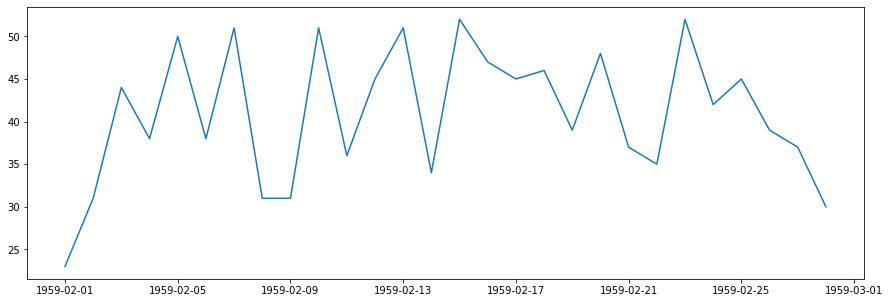

In [59]:
# plot line chart for January data using Matplotlib library
plt.figure(figsize=(15,5))
plt.plot(female_birth.loc['1959-02-01':'1959-02-28'][['Births']])


#                                              The End